## Precios de Combustibles 

In [157]:
import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [158]:
df=pd.read_csv('Precios_Combustible.csv')

In [159]:
df.shape

(35978, 19)

In [160]:
df.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
3,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
4,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."


In [161]:
df.value_counts().index

MultiIndex([('2020-07', 8952, '33-71518900-9',               'ADD SRL', ...),
            ('2019-12', 3570, '30-51618667-0', 'DEHEZA S.A.I.C.I.F.I.', ...),
            ('2019-12', 3559, '30-51618667-0',    'DEHEZA S.A.I.C.F.I', ...),
            ('2019-12', 3559, '30-51618667-0',    'DEHEZA S.A.I.C.F.I', ...),
            ('2019-12', 3559, '30-51618667-0',    'DEHEZA S.A.I.C.F.I', ...),
            ('2019-12', 3559, '30-51618667-0',    'DEHEZA S.A.I.C.F.I', ...),
            ('2019-12', 3568, '30-51618667-0',   'DEHEZA S.A.I.C.F.I.', ...),
            ('2019-12', 3568, '30-51618667-0',   'DEHEZA S.A.I.C.F.I.', ...),
            ('2019-12', 3568, '30-51618667-0',   'DEHEZA S.A.I.C.F.I.', ...),
            ('2019-12', 3568, '30-51618667-0',   'DEHEZA S.A.I.C.F.I.', ...),
            ...
            ('2020-03',  842, '30-67877449-5',    'OPESSA ACA GALARZA', ...),
            ('2020-03',  842, '30-67877449-5',    'OPESSA ACA GALARZA', ...),
            ('2020-03',  842, '30-67877449-5',  

In [162]:
df.isnull().sum()

indice_tiempo          0
idempresa              0
cuit                   0
empresa                0
direccion             14
localidad              0
provincia              0
region              3383
idproducto             0
producto               0
idtipohorario          0
tipohorario            0
precio                 0
fecha_vigencia         0
idempresabandera       0
empresabandera         0
latitud               98
longitud              98
geojson               98
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35978 entries, 0 to 35977
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indice_tiempo     35978 non-null  object 
 1   idempresa         35978 non-null  int64  
 2   cuit              35978 non-null  object 
 3   empresa           35978 non-null  object 
 4   direccion         35964 non-null  object 
 5   localidad         35978 non-null  object 
 6   provincia         35978 non-null  object 
 7   region            32595 non-null  object 
 8   idproducto        35978 non-null  int64  
 9   producto          35978 non-null  object 
 10  idtipohorario     35978 non-null  int64  
 11  tipohorario       35978 non-null  object 
 12  precio            35978 non-null  float64
 13  fecha_vigencia    35978 non-null  object 
 14  idempresabandera  35978 non-null  int64  
 15  empresabandera    35978 non-null  object 
 16  latitud           35880 non-null  float6

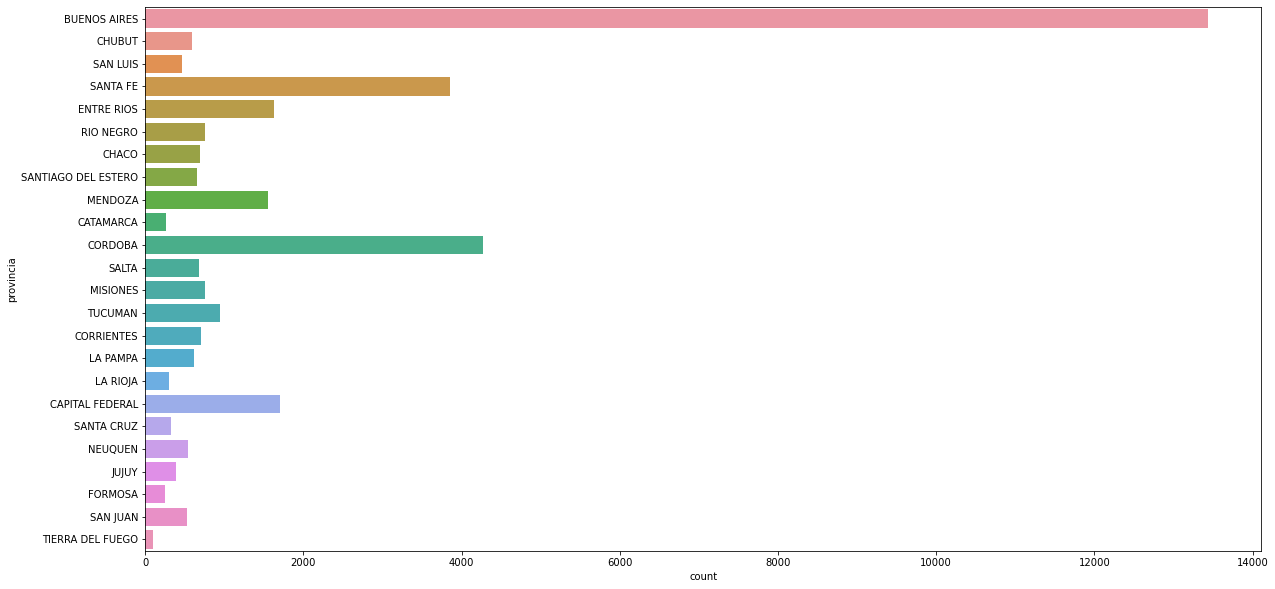

In [164]:
plt.figure(figsize=(20,10))
sns.countplot(y=df['provincia'])
plt.show()

In [165]:
df_t=df[df.provincia.isin(['TUCUMAN','SANTIAGO DEL ESTERO','CATAMARCA','SALTA','JUJUY','CORDOBA'])]

In [166]:
df_t.shape

(7206, 19)

In [167]:
df_bs=df[df.provincia.isin(['BUENOS AIRES'])] 
df_bs.shape

(13438, 19)

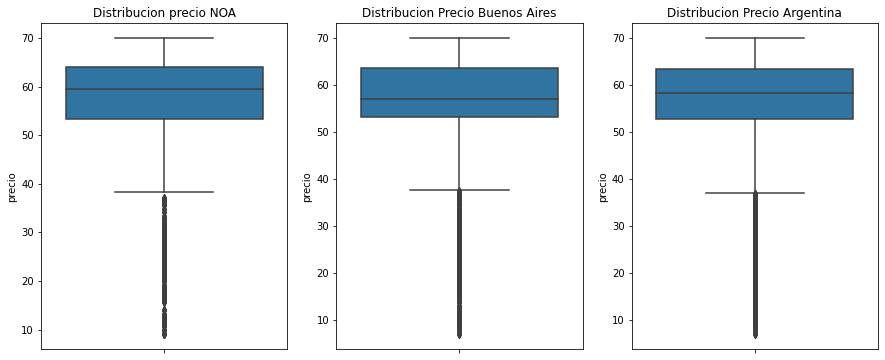

In [168]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=df_t['precio']) 
plt.title('Distribucion precio NOA') 
plt.subplot(1,3,2)
sns.boxplot(y=df_bs['precio']) 
plt.title('Distribucion Precio Buenos Aires') 
plt.subplot(1,3,3)
sns.boxplot(y=df['precio'])
plt.title('Distribucion Precio Argentina')
plt.show()

In [169]:
promedio=df_bs['precio'].mean()
std=df_bs['']

KeyError: ''

In [170]:
df_t['precio'].mean()

53.921345545378855

In [171]:
df_t.describe()

,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
count,7206.00000,7206.000000,7206.000000,7206.000000,7206.000000,7170.000000,7170.000000
mean,5068.03053,10.544546,2.500000,53.921346,5.788232,-29.698052,-64.296425
std,2964.61060,8.379738,0.500035,14.951625,7.800593,3.057381,0.980289
min,105.00000,2.000000,2.000000,8.990000,1.000000,-34.903929,-68.760231
25%,2488.25000,3.000000,2.000000,53.390000,2.000000,-31.720810,-65.156670
50%,4998.00000,6.000000,2.500000,59.490000,2.000000,-31.347220,-64.263279
75%,7727.00000,19.000000,3.000000,63.990000,4.000000,-27.038890,-64.020377
max,9869.00000,21.000000,3.000000,69.990000,29.000000,-22.055820,-58.391527


In [172]:
df_bs.describe()

,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
count,13438.000000,13438.000000,13438.000000,13438.000000,13438.000000,13430.000000,13430.000000
mean,4821.558863,10.600238,2.499851,53.630095,8.061542,-35.348312,-59.105056
std,2894.213051,8.411119,0.500019,14.033017,9.613287,1.384129,1.350285
min,102.000000,2.000000,2.000000,7.000000,1.000000,-40.800308,-66.847852
25%,2085.000000,3.000000,2.000000,53.190000,2.000000,-35.627690,-59.500150
50%,4741.000000,6.000000,2.000000,56.930000,3.000000,-34.740776,-58.608905
75%,7391.000000,19.000000,3.000000,63.540000,17.000000,-34.563043,-58.389508
max,9868.000000,21.000000,3.000000,69.990000,29.000000,-29.413973,-56.679214


In [173]:
df.describe()

,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
count,35978.000000,35978.000000,35978.000000,35978.000000,35978.000000,35880.000000,35880.000000
mean,4787.268331,10.696731,2.499917,53.966124,6.977792,-33.438268,-61.596900
std,2976.245410,8.470895,0.500007,13.690445,8.982454,4.096437,3.623312
min,102.000000,2.000000,2.000000,7.000000,1.000000,-54.829501,-72.338930
25%,2006.000000,3.000000,2.000000,52.770000,2.000000,-34.787043,-64.263150
50%,4600.000000,6.000000,2.000000,58.225000,2.000000,-34.062579,-60.669132
75%,7519.750000,19.000000,3.000000,63.330000,4.000000,-31.459992,-58.549560
max,9870.000000,21.000000,3.000000,69.990000,29.000000,-22.055820,-53.648260


In [174]:
df.provincia.unique()

array(['BUENOS AIRES', 'CHUBUT', 'SAN LUIS', 'SANTA FE', 'ENTRE RIOS',
       'RIO NEGRO', 'CHACO', 'SANTIAGO DEL ESTERO', 'MENDOZA',
       'CATAMARCA', 'CORDOBA', 'SALTA', 'MISIONES', 'TUCUMAN',
       'CORRIENTES', 'LA PAMPA', 'LA RIOJA', 'CAPITAL FEDERAL',
       'SANTA CRUZ', 'NEUQUEN', 'JUJUY', 'FORMOSA', 'SAN JUAN',
       'TIERRA DEL FUEGO'], dtype=object)

### Damos formato de tiempo a la columna "Fecha_Vigencia"

In [175]:
df.fecha_vigencia=pd.to_datetime(df.fecha_vigencia)
df

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
3,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
4,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35973,2020-03,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,3,Nafta (premium) de más de 95 Ron,3,Nocturno,63.25,2020-03-02 00:00:00,2,YPF,-34.660540,-58.607850,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
35974,2020-03,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,54.48,2020-03-02 00:00:00,2,YPF,-34.660540,-58.607850,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
35975,2020-03,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,54.48,2020-03-02 00:00:00,2,YPF,-34.660540,-58.607850,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
35976,2020-04,2243,30-53852511-8,ALFREDO BRUGNOLI E HIJOS S.C.C,NaN,CONCEPCION DEL BERMEJO,CHACO,NEA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,61.20,2020-04-30 10:01:00,1,BLANCA,-26.602490,-60.953010,"{""type"":""Point"",""coordinates"":[-60.95301,-26.6..."


In [186]:
## Se reordena el dataset por fecha
df.sort_values('fecha_vigencia',inplace=True) 
df.reset_index(drop=True, inplace= True) 
df

,fecha_vigencia,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
0,2016-04-01,6691.000000,6.000000,2.500000,12.490000,1.000000,-37.327078,-62.347532
1,2016-04-02,6625.508197,6.000000,2.500000,12.480984,1.016393,-37.275816,-62.320792
2,2016-04-03,6560.016393,6.000000,2.500000,12.471967,1.032787,-37.224553,-62.294051
3,2016-04-04,6494.524590,6.000000,2.500000,12.462951,1.049180,-37.173291,-62.267310
4,2016-04-05,6429.032787,6.000000,2.500000,12.453934,1.065574,-37.122029,-62.240570
...,...,...,...,...,...,...,...,...
1565,2020-07-14,6363.312500,9.625000,2.500000,58.322500,16.656250,-33.727064,-59.281346
1566,2020-07-15,5057.683544,9.873418,2.506329,55.989747,19.291139,-32.327776,-62.447933
1567,2020-07-16,6483.505263,8.126316,2.505263,58.743053,12.210526,-34.427946,-62.263375
1568,2020-07-17,5327.400000,13.600000,2.500000,51.408000,10.000000,-30.693651,-61.109909


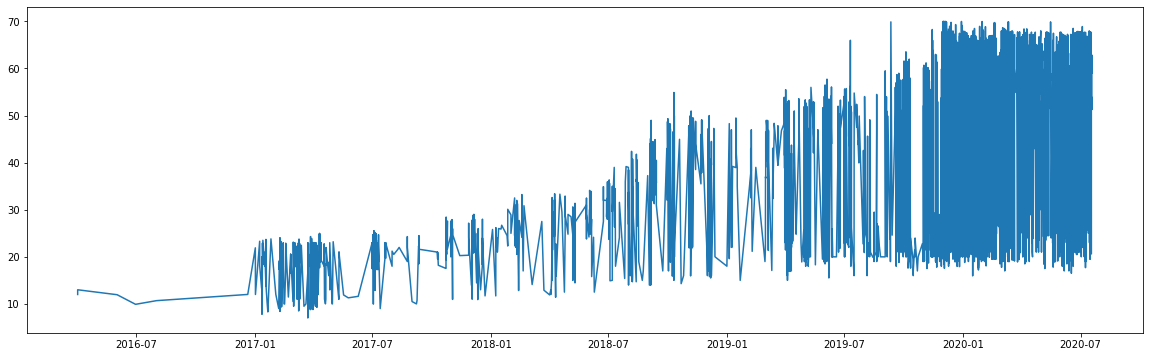

In [177]:
plt.figure(figsize=(20,6)) 
plt.plot(df.fecha_vigencia, df.precio)
plt.show()

In [178]:
#Observamos la fechas faltantes
df['date_check'] = df.fecha_vigencia.diff()
df.date_check.value_counts()

0 days 00:00:00    29321
0 days 00:01:00     2299
0 days 00:02:00      562
0 days 00:03:00      293
0 days 00:04:00      198
                   ...  
0 days 14:06:00        1
6 days 05:45:00        1
2 days 00:51:00        1
0 days 12:29:00        1
0 days 19:32:00        1
Name: date_check, Length: 924, dtype: int64

In [179]:
#Rellenamos la fechas faltantes
df = df.set_index("fecha_vigencia").resample("d").mean().reset_index()

In [180]:
df

,fecha_vigencia,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
0,2016-04-01,6691.000000,6.000000,2.500000,12.490000,1.000000,-37.327078,-62.347532
1,2016-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1565,2020-07-14,6363.312500,9.625000,2.500000,58.322500,16.656250,-33.727064,-59.281346
1566,2020-07-15,5057.683544,9.873418,2.506329,55.989747,19.291139,-32.327776,-62.447933
1567,2020-07-16,6483.505263,8.126316,2.505263,58.743053,12.210526,-34.427946,-62.263375
1568,2020-07-17,5327.400000,13.600000,2.500000,51.408000,10.000000,-30.693651,-61.109909


In [193]:
df.rename(columns={'fecha_vigencia':'fecha'}, inplace=True)
df=df[['fecha','precio']]
df

,fecha,precio
0,2016-04-01,12.490000
1,2016-04-02,12.480984
2,2016-04-03,12.471967
3,2016-04-04,12.462951
4,2016-04-05,12.453934
...,...,...
1565,2020-07-14,58.322500
1566,2020-07-15,55.989747
1567,2020-07-16,58.743053
1568,2020-07-17,51.408000


In [194]:
print(df.isna().sum())
df = df.interpolate()
print(df.isna().sum())

fecha     0
precio    0
dtype: int64
fecha     0
precio    0
dtype: int64


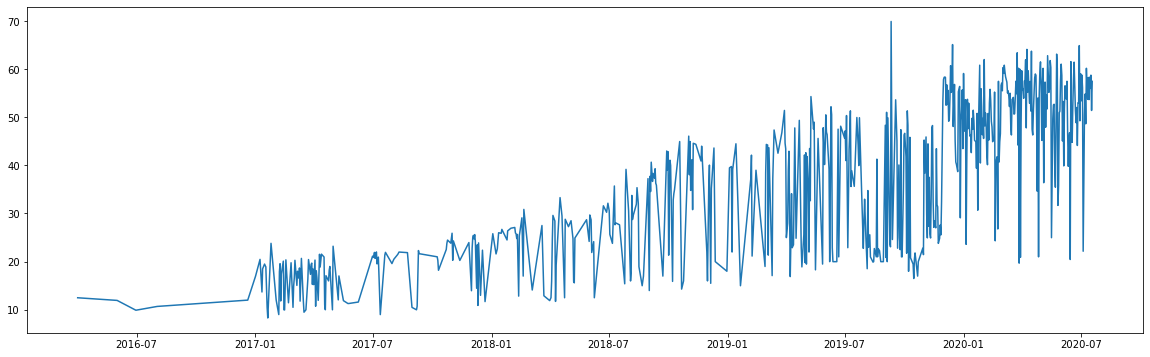

In [195]:
plt.figure(figsize=(20,6))
plt.plot(df.fecha, df.precio)
plt.show()

In [196]:
promedio_diario=df.precio.rolling(window=7, center=True).mean()
promedio_diario

0             NaN
1             NaN
2             NaN
3       12.462951
4       12.453934
          ...    
1565    55.731369
1566    56.263750
1567          NaN
1568          NaN
1569          NaN
Name: precio, Length: 1570, dtype: float64

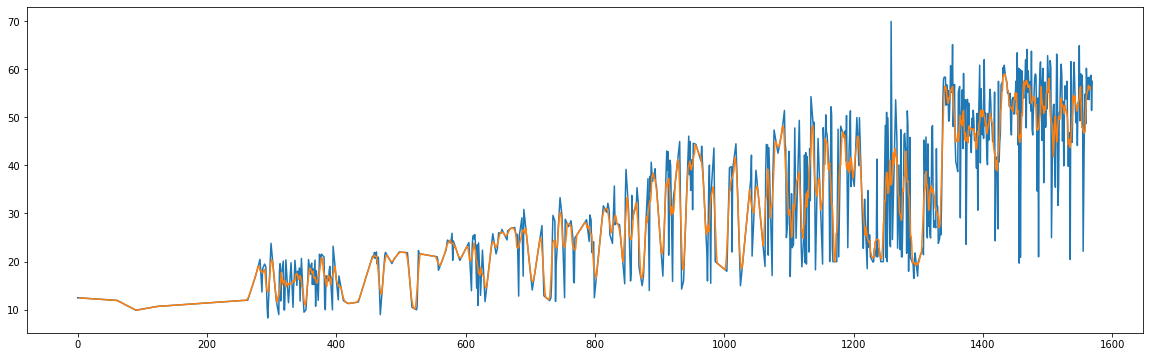

In [197]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df.precio)
plt.plot(promedio_diario)
plt.show()

In [201]:
mensual=df.resample('M', on='fecha').mean() 
mensual.shape

(52, 1)

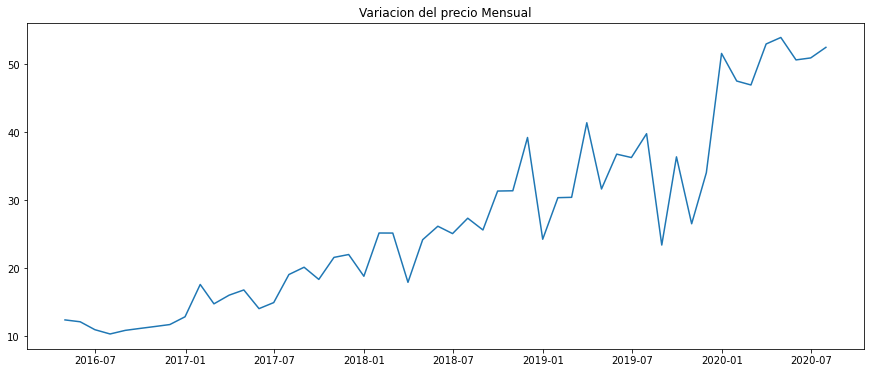

In [206]:
plt.figure(figsize=(15,6))
plt.plot(mensual) 
plt.title('Variacion del precio Mensual') 
plt.show()

In [207]:
promedio_mensual=mensual.precio.rolling(window=7, center=True).mean()
promedio_mensual

fecha
2016-04-30          NaN
2016-05-31          NaN
2016-06-30          NaN
2016-07-31    11.281628
2016-08-31    11.184165
2016-09-30    11.289265
2016-10-31    12.239887
2016-11-30    12.873332
2016-12-31    13.613311
2017-01-31    14.422060
2017-02-28    14.797342
2017-03-31    15.259046
2017-04-30    16.147123
2017-05-31    16.509335
2017-06-30    17.022862
2017-07-31    17.816997
2017-08-31    18.561767
2017-09-30    19.242302
2017-10-31    20.704766
2017-11-30    21.576360
2017-12-31    21.259188
2018-01-31    22.093527
2018-02-28    22.748302
2018-03-31    23.188149
2018-04-30    24.408428
2018-05-31    24.472181
2018-06-30    25.355447
2018-07-31    27.279713
2018-08-31    29.428458
2018-09-30    29.155155
2018-10-31    29.910424
2018-11-30    30.349213
2018-12-31    32.603269
2019-01-31    32.646481
2019-02-28    33.416484
2019-03-31    32.995230
2019-04-30    35.213640
2019-05-31    34.217972
2019-06-30    35.068865
2019-07-31    32.945477
2019-08-31    33.288724
2019-09-30

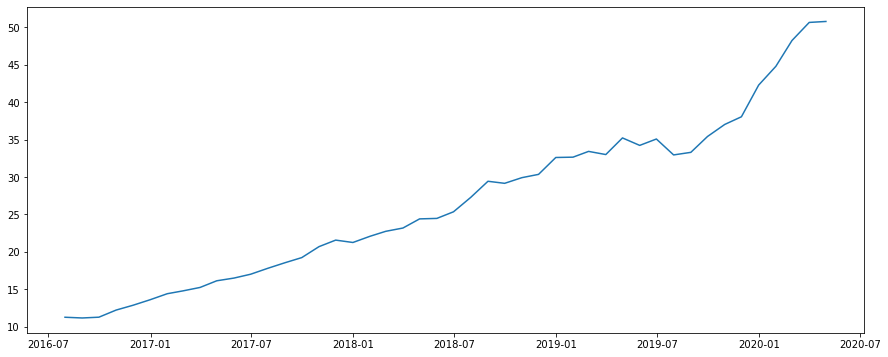

In [209]:
plt.figure(figsize=(15,6))
plt.plot(promedio_mensual)
plt.show()

## Prueba de prediccion 

In [308]:
diario=df.resample('d', on='fecha').mean() 
diario

,precio
fecha,
2016-04-01,12.490000
2016-04-02,12.480984
2016-04-03,12.471967
2016-04-04,12.462951
2016-04-05,12.453934
...,...
2020-07-14,58.322500
2020-07-15,55.989747
2020-07-16,58.743053


In [309]:
diario=diario.precio
diario.head()

fecha
2016-04-01    12.490000
2016-04-02    12.480984
2016-04-03    12.471967
2016-04-04    12.462951
2016-04-05    12.453934
Freq: D, Name: precio, dtype: float64

In [310]:
look_back=90*1 #uso 90 dias para predecir el valor siguiente

In [311]:
N=diario.shape[0]
X=np.zeros((N- look_back - 1, look_back))
y=np.zeros(N- look_back-1)
print(X.shape, y.shape)

(1479, 90) (1479,)


In [312]:
# LLenamos las funcion x e y

for i in range (X.shape[0]): 
    X[i,:]= diario.iloc[i:i+look_back]
    y[i]=diario.iloc[i+look_back]

In [324]:
N_train= 365*2- look_back
N_test=365 

length_total= N_train + N_test + look_back 

X_train = X[:N_train,:]
y_train= y[:N_train]
print(X_train.shape, y_train.shape)

X_test= X[N_train:N_train+N_test,:]
y_test= y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)


(640, 90) (640,)
(365, 90) (365,)


In [314]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [315]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [316]:
mean_squared_error(y_test, y_test_pred, squared=False)

9.883531843226093

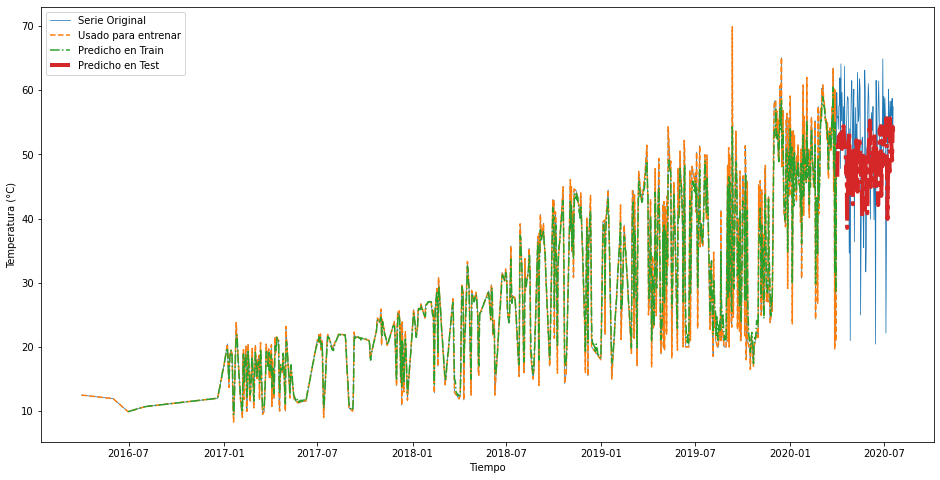

In [317]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back+1: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

Error del train: 2.084329891445156
Error del test: 9.883531843226093


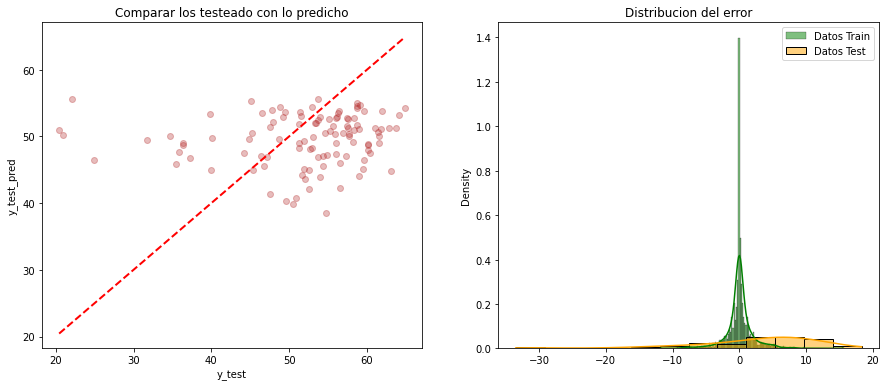

In [318]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred,alpha=0.3,color='firebrick')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.subplot(1,2,2)
sns.histplot(y_train-y_train_pred, kde=True,label='Datos Train',stat='density',color='green')
sns.histplot(y_test-y_test_pred, kde=True,label='Datos Test',stat='density',color='orange')
plt.title('Distribucion del error')
plt.legend()

MSE=mean_squared_error(y_train,y_train_pred,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
print('Error del train:',MSE)
print('Error del test:',MSE_test)

plt.show()

In [325]:
from sklearn.neural_network import MLPRegressor 
rn_regre= MLPRegressor(max_iter=800, learning_rate='adaptive')
rn_regre.fit(X_train, y_train) 

MLPRegressor(learning_rate='adaptive', max_iter=800)

In [326]:
y_pred=rn_regre.predict(X)
y_train_pred=rn_regre.predict(X_train) 
y_test_pred=rn_regre.predict(X_test)

In [327]:
rmse_test= mean_squared_error(y_test, y_test_pred, squared= False)
rmse_train= mean_squared_error(y_train, y_train_pred, squared=False) 
print(rmse_train)
print(rmse_test)

2.0787387623950426
6.095761424681847


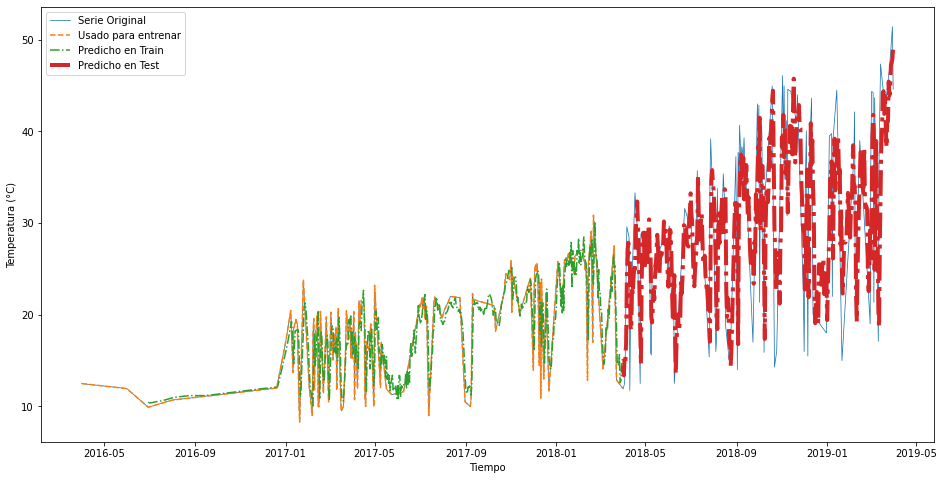

In [330]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

Error del train: 2.0787387623950426
Error del test: 6.095761424681847


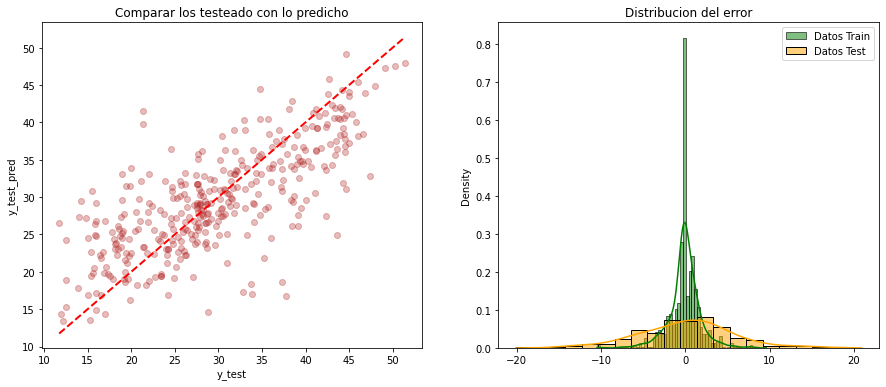

In [331]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred,alpha=0.3,color='firebrick')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.subplot(1,2,2)
sns.histplot(y_train-y_train_pred, kde=True,label='Datos Train',stat='density',color='green')
sns.histplot(y_test-y_test_pred, kde=True,label='Datos Test',stat='density',color='orange')
plt.title('Distribucion del error')
plt.legend()

MSE=mean_squared_error(y_train,y_train_pred,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
print('Error del train:',MSE)
print('Error del test:',MSE_test)

plt.show()